In [176]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.filters as filters
import cvlib

def showimage(image, show=True):
    plt.figure(figsize=(12, int(12 * image.shape[0] / image.shape[1])))
    plt.imshow(image)
    if show:
        plt.show()

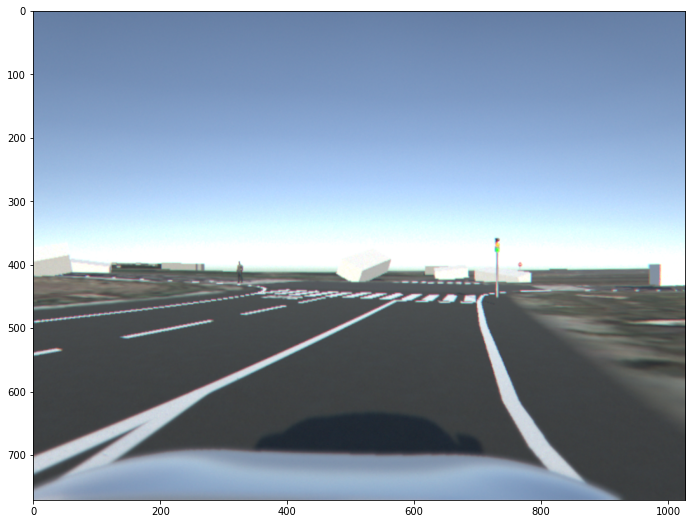

In [151]:
red_orange = cv.imread("red-orange.png")
orange = cv.imread("orange.png")
green_orange = cv.imread("orange-green.png")
showimage(cv.cvtColor(green_orange, cv.COLOR_BGR2RGB))

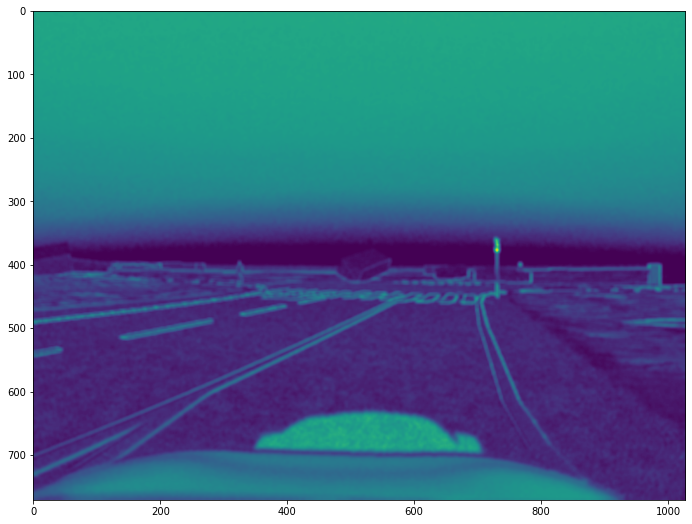

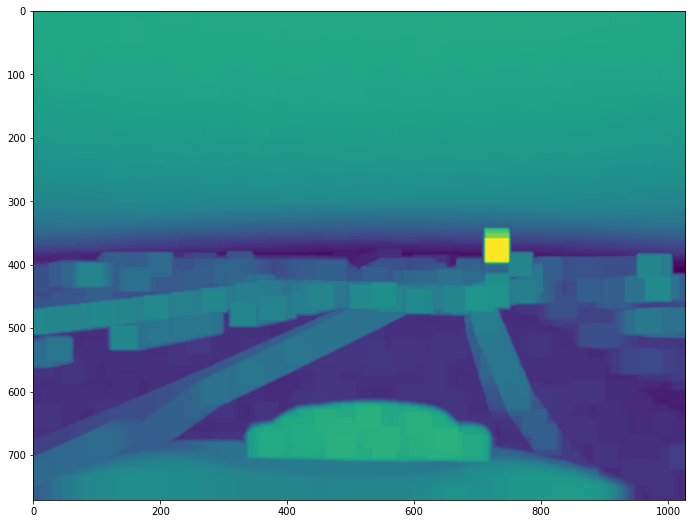

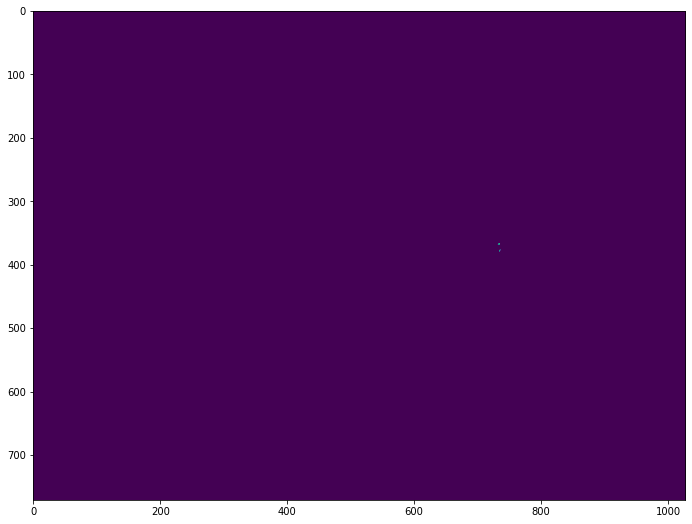

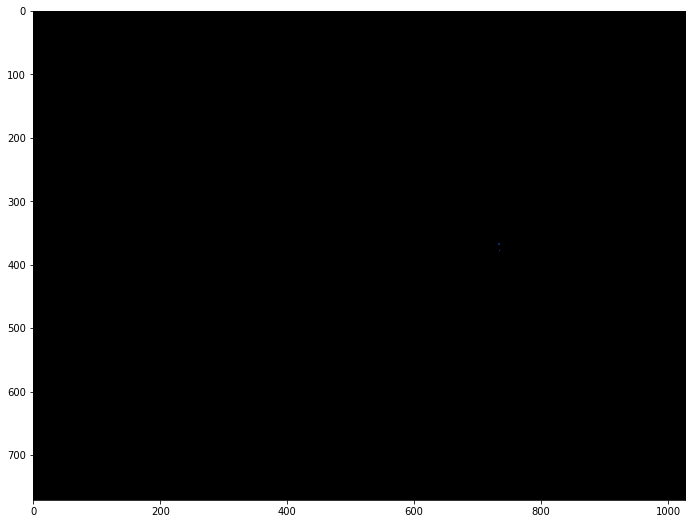

In [173]:
image = green_orange
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)
hue = hsv_image[:, :, 0]
saturation = cv.GaussianBlur(hsv_image[:, :, 1], (7, 7), 3)
value = cv.GaussianBlur(hsv_image[:, :, 2], (7, 7), 3)
showimage(saturation)
filtered = filters.maximum_filter(saturation, (35, 35))
showimage(filtered)
mask = (filtered == np.max(saturation)) & (value > 250) & (saturation > np.max(saturation) * 0.3) & (hue < 100)
showimage(mask)
masked = hsv_image.copy()
masked[mask == 0, :] = 0
showimage(masked)

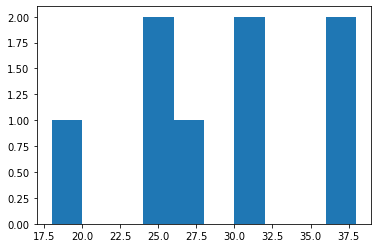

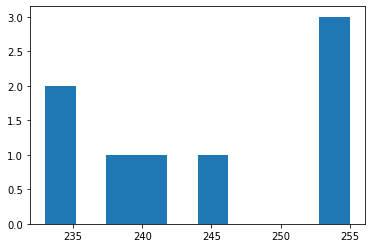

In [174]:
hue = hsv_image[mask, 0]
value = hsv_image[mask, 2]
plt.hist(hue)
plt.show()
plt.hist(value)
plt.show()

In [175]:
from sklearn.neighbors import KernelDensity

hue_density = KernelDensity(bandwidth=10, kernel="epanechnikov")
hue_density.fit(hue.reshape(-1, 1))
hue_density_values = hue_density.score_samples(np.arange(0, 180, 1).reshape(-1, 1))
max_density_hue = np.argmax(hue_density_values)
max_density_hue

30

[[806, 248, 837, 327], [-1, 382, 15, 437]]
['traffic light', 'person']
[0.9537265300750732, 0.5019911527633667]


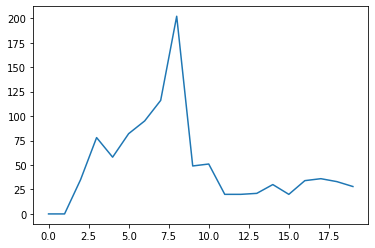

In [212]:
bboxs, labels, confs = cvlib.detect_common_objects(orange, enable_gpu=True)
print(bboxs)
print(labels)
print(confs)
for bbox, label, conf in zip(bboxs, labels, confs):
    if label != "traffic light": continue
    area = orange[bbox[1]:bbox[3], bbox[0]:bbox[2]]
    hue = cv.cvtColor(area, cv.COLOR_BGR2HSV)[:, :, 0]
    hue_hist = cv.calcHist([(hue + 90) % 180], [0], None, [20], [80, 160])
    plt.plot(hue_hist)

In [188]:
area

array([], shape=(0, 79, 3), dtype=uint8)